In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import os 

In [3]:
fredQD = pd.read_csv('./Data/FRED_QD_Data.csv')
fredMD = pd.read_csv('./Data/FRED_MD_Data.csv')

In [7]:
fredQD.head()

,sasdate,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio
0,factors,0.000,0.000,1.0000,1.0000,1.0000,0.000,0.0000,1.0000,1.0000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.0000,0.0000,0.0000
1,transform,5.000,5.000,5.0000,5.0000,5.0000,5.000,5.0000,5.0000,5.0000,...,2.00,5.00,1.00,5.00,5.00,2.00,5.0000,5.0000,2.0000,5.0000
2,3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
3,6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
4,9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544


In [8]:
fredMD.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


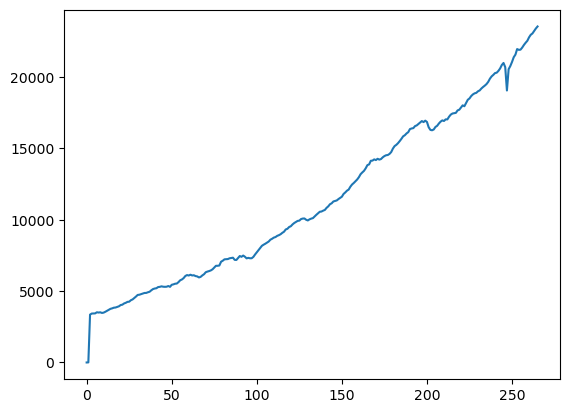

In [23]:
plt.plot(fredQD['GDPC1'], label='Original GDPC1')

In [24]:
## meta informationen entfernen und zu datetime konvertieren
fredQD_after_second = fredQD.iloc[2:]
fredQD_after_second['sasdate'] = pd.to_datetime(fredQD_after_second['sasdate'])
fredQD_after_second

/var/folders/01/0kkk3sm55p5_dtxnk5www9r00000gn/T/ipykernel_992/779900898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fredQD_after_second['sasdate'] = pd.to_datetime(fredQD_after_second['sasdate'])


,sasdate,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio
2,1959-03-01,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
3,1959-06-01,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
4,1959-09-01,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
5,1959-12-01,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
6,1960-03-01,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2023-12-01,22960.600,15781.367,2004.7389,10422.9997,3381.4939,4244.835,4164.7073,1294.6535,3432.9110,...,1060.88,9978353.01,408057.82,22721362.92,12628.37,516.43,2445.3282,4471.5033,1.5669,24.6339
262,2024-03-01,23053.545,15856.867,1995.8869,10510.6699,3374.3097,4282.515,4231.1675,1295.7560,3470.9873,...,1109.91,9976535.72,423329.39,22470735.41,12370.88,524.93,2356.6840,4999.3800,1.4143,26.8756
263,2024-06-01,23223.906,15967.266,2022.5443,10582.0770,3388.3416,4369.185,4255.4844,1326.4911,3504.1342,...,1063.06,9992954.72,406441.59,22482953.59,12364.86,502.91,2458.6447,5254.2867,1.3632,27.5285
264,2024-09-01,23400.294,16113.035,2059.9709,10656.0511,3426.7369,4377.736,4277.4648,1360.9966,3538.8075,...,1085.39,10045668.07,407621.43,22568468.32,12392.72,502.86,2464.4603,5545.8233,1.3151,28.5810


In [25]:
def transform_dataset_with_tcodes(df: pd.DataFrame, tcodes: dict):
    """
    Transformiert ein gesamtes DataFrame gemäß eines Dictionarys von Transformationscodes 
    um die Zeitreihen stationär zu machen.

    Parameter:
        df     : pd.DataFrame – Ursprüngliches DataFrame mit Zeitreihen
        tcodes : dict         – Dictionary {Spaltenname: TCode (int)}

    Rückgabe:
        transformed_df : pd.DataFrame – Transformiertes DataFrame
        applied_codes  : dict         – Angewendete Transformationen pro Spalte
    """
    transformed_df = pd.DataFrame(index=df.index)
    applied_codes = {}

    for col in df.columns:
        tcode = tcodes.get(col, 1)  
        s = df[col].copy()

        try:
            if tcode == 1:
                transformed = s
                desc = "Level (keine Transformation)"
            elif tcode == 2:
                transformed = s.diff()
                desc = "Erste Differenz"
            elif tcode == 3:
                transformed = s.diff().diff()
                desc = "Zweite Differenz"
            elif tcode == 4:
                transformed = np.log(s)
                desc = "Log-Level"
            elif tcode == 5:
                transformed = np.log(s).diff()
                desc = "Erste Log-Differenz (≈ Wachstumsrate)"
            elif tcode == 6:
                transformed = np.log(s).diff().diff()
                desc = "Zweite Log-Differenz"
            elif tcode == 7:
                transformed = 100 * (s / s.shift(1) - 1)
                desc = "Prozentuale Veränderung"
            else:
                transformed = s
                desc = "Unbekannter Code – keine Transformation"
        except Exception as e:
            transformed = pd.Series(np.nan, index=s.index)
            desc = f"Fehler bei Transformation: {str(e)}"

        transformed_df[col] = transformed
        applied_codes[col] = desc

    return transformed_df, applied_codes


In [26]:
fredQD_stationary, applied_codes = transform_dataset_with_tcodes(fredQD.iloc[2:], fredQD.iloc[1])
fredQD_stationary['sasdate'] = pd.to_datetime(fredQD_stationary['sasdate'])
fredQD_stationary.head()

fredQD_stationary.to_csv('./Data/fredQD_stationary.csv', index=False)

/var/folders/01/0kkk3sm55p5_dtxnk5www9r00000gn/T/ipykernel_992/3976290360.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[col] = transformed
/var/folders/01/0kkk3sm55p5_dtxnk5www9r00000gn/T/ipykernel_992/3976290360.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[col] = transformed
/var/folders/01/0kkk3sm55p5_dtxnk5www9r00000gn/T/ipykernel_992/3976290360.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

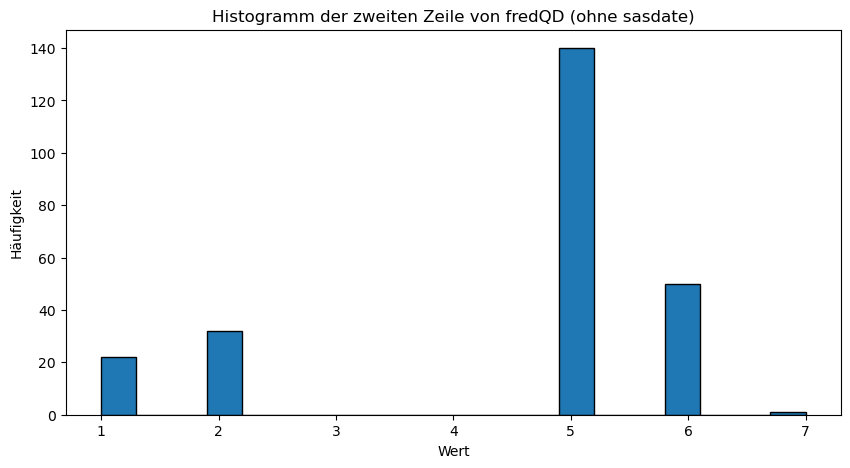

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(fredQD.iloc[1, 1:].dropna().astype(float), bins=20, edgecolor='black')
plt.title('Histogramm der zweiten Zeile von fredQD (ohne sasdate)')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

In [28]:
## Wichtge Wirtschaftskrisen 
krisen = [
    ("1973-11-01", "1975-03-01"),  # Ölkrise
    ("1980-01-01", "1980-07-01"),  # Rezession
    ("1981-07-01", "1982-11-01"),  # Volcker-Rezession
    ("1990-07-01", "1991-03-01"),  # Golfkrise
    ("2001-03-01", "2001-11-01"),  # Dotcom-Blase
    ("2007-12-01", "2009-06-01"),  # Finanzkrise
    ("2020-02-01", "2021-12-01")   # COVID-19-Pandemie
]

# Datumskonvertierung
krisen = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in krisen]

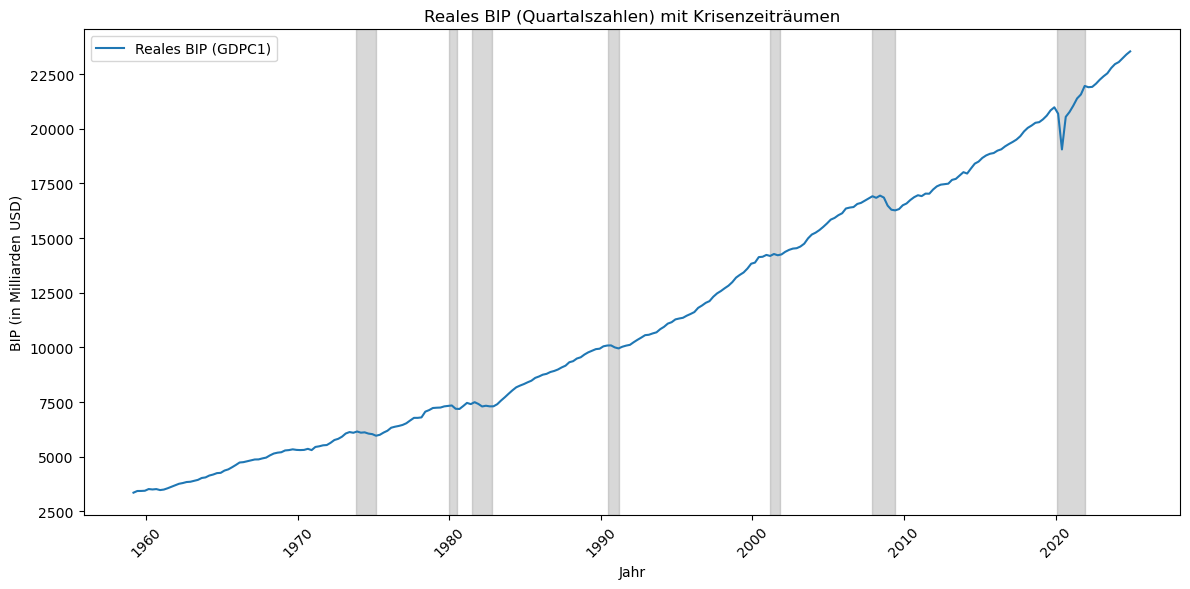

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(fredQD_after_second['sasdate'], fredQD_after_second['GDPC1'], label='Reales BIP (GDPC1)')
plt.xlabel('Jahr')
plt.ylabel('BIP (in Milliarden USD)')
plt.title('Reales BIP (Quartalszahlen) mit Krisenzeiträumen')
plt.legend()

# Graue Schattierung für Krisenzeiträume
ax = plt.gca()
for start, end in krisen:
    ax.axvspan(start, end, color='gray', alpha=0.3)

# Achsenformatierung: nur alle 10 Jahre anzeigen
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

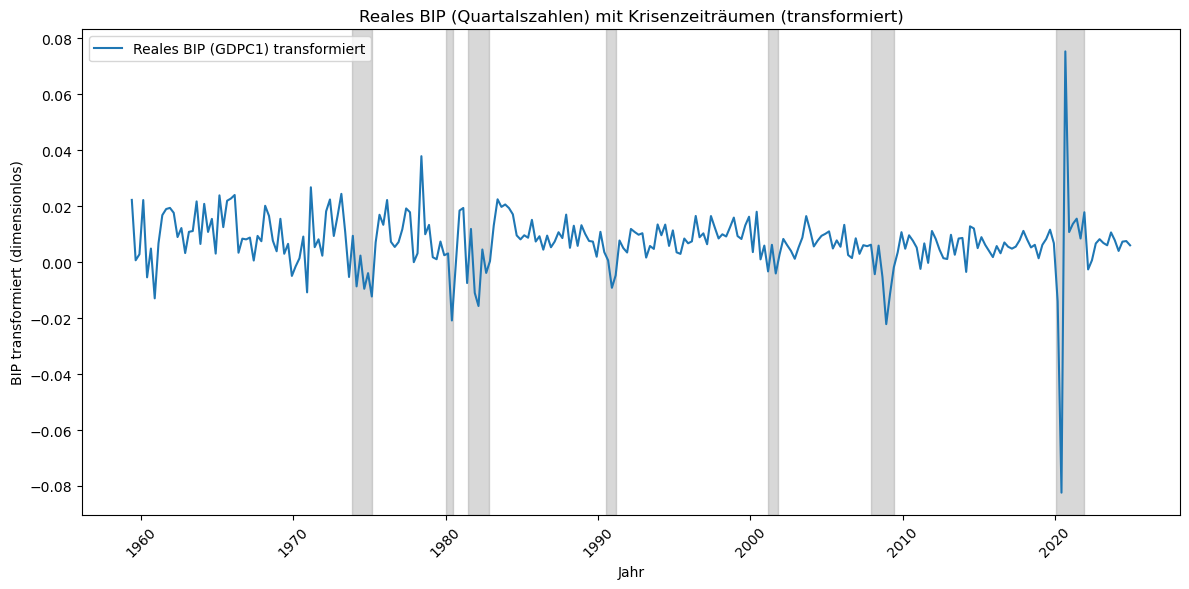

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(fredQD_stationary['sasdate'], fredQD_stationary['GDPC1'], label='Reales BIP (GDPC1) transformiert')
plt.xlabel('Jahr')
plt.ylabel('BIP transformiert (dimensionlos)')
plt.title('Reales BIP (Quartalszahlen) mit Krisenzeiträumen (transformiert)')
plt.legend()

# Graue Schattierung für Krisenzeiträume
ax = plt.gca()
for start, end in krisen:
    ax.axvspan(start, end, color='gray', alpha=0.3)

# Achsenformatierung: nur alle 10 Jahre anzeigen
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
NA000334Q = pd.read_csv('./Data/NA000334Q.csv')
NA000334Q['observation_date'] = pd.to_datetime(NA000334Q['observation_date'])

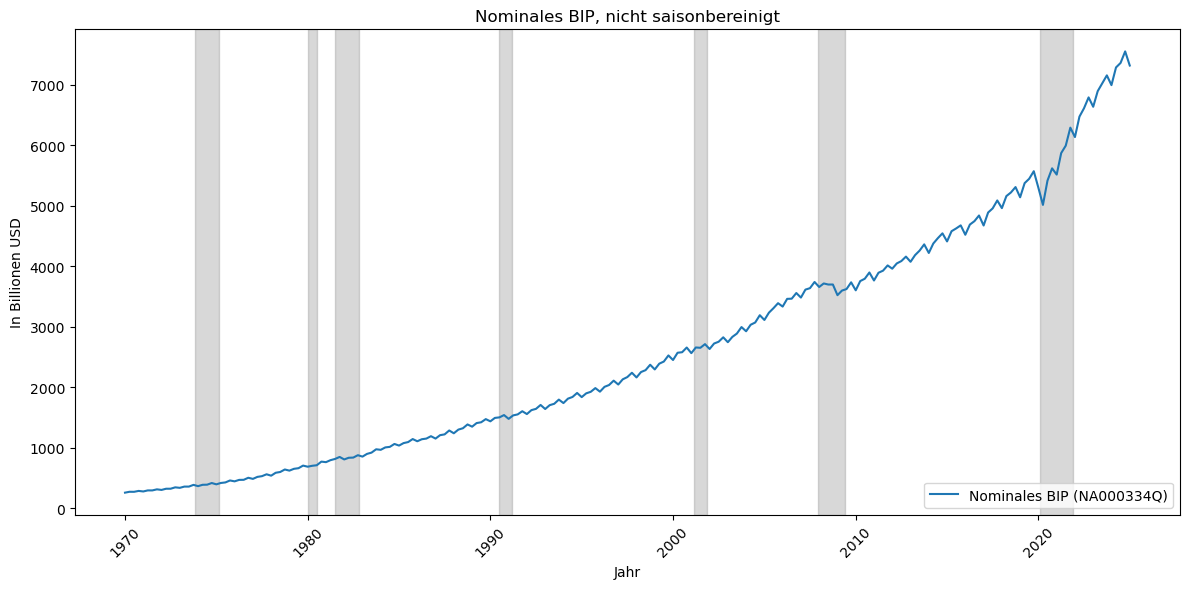

In [32]:
start_date = '1970-01-01'
end_date = '2025-04-01'
maskfna = (NA000334Q['observation_date'] >= start_date) & (NA000334Q['observation_date'] <= end_date)
plt.figure(figsize=(12, 6))
plt.plot(NA000334Q.loc[maskfna, 'observation_date'], NA000334Q.loc[maskfna, 'NA000334Q']/1000, label='Nominales BIP (NA000334Q)')
plt.xlabel('Jahr')
plt.ylabel('In Billionen USD')
plt.title('Nominales BIP, nicht saisonbereinigt') 
plt.legend()

# Graue Schattierung für Krisenzeiträume
ax = plt.gca()
for start, end in krisen:
    ax.axvspan(start, end, color='gray', alpha=0.3)

# Achsenformatierung: nur alle 10 Jahre anzeigen
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

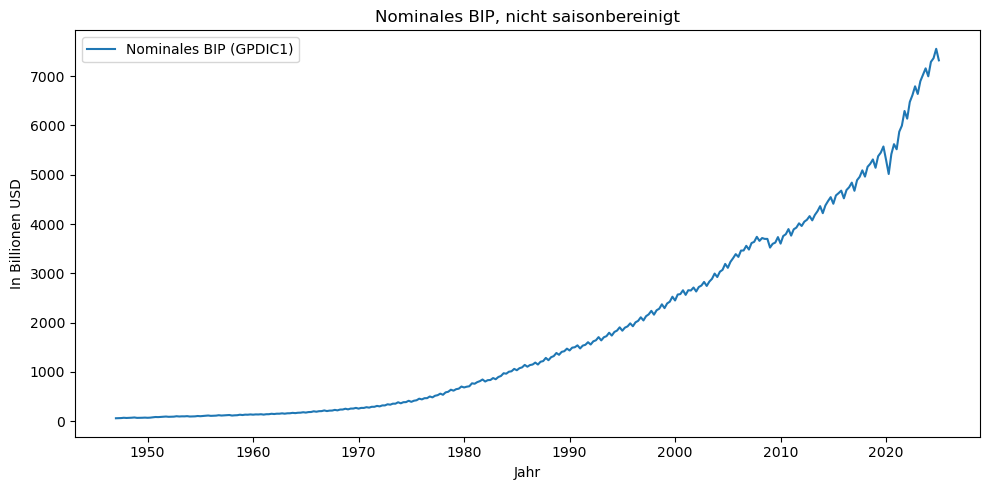

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(NA000334Q.observation_date ,NA000334Q.NA000334Q/1000, label='Nominales BIP (GPDIC1)')
plt.xlabel('Jahr')
plt.ylabel('In Billionen USD')
plt.title('Nominales BIP, nicht saisonbereinigt') 
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def load_fred_data() -> pd.DataFrame:
    local_path: str = "./Data/FRED_QD_Data.csv",
    url: str = "https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/quarterly/current.csv"
    """
    Lädt FRED-Quartalsdaten entweder lokal oder lädt sie bei Bedarf aus dem Internet herunter.
    
    Parameter:
        local_path (str): Pfad zur lokalen CSV-Datei
        url (str): URL zur CSV-Datei im Internet

    Rückgabe:
        pd.DataFrame: Geladene Daten als DataFrame
    """
    if not os.path.exists(local_path):
        print(f"Datei nicht gefunden. Lade herunter von:\n{url}\n")
        try:
            urllib.request.urlretrieve(url, local_path)
            print(f"Datei gespeichert als '{local_path}'")
        except Exception as e:
            raise RuntimeError(f"Fehler beim Herunterladen: {e}")
    else:
        print(f"Datei '{local_path}' gefunden. Lade lokal...")

    try:
        df = pd.read_csv(local_path)
        print("Datei erfolgreich geladen.")
        print(df.head())  # Zeige die ersten Zeilen des DataFrames an
        df['sasdate'] = pd.to_datetime(df['sasdate'])

        return df
    except Exception as e:
        raise RuntimeError(f"Fehler beim Einlesen der CSV-Datei: {e}")

In [ ]:
def load_fred_MD_data() -> pd.DataFrame:
    local_path: str = "./Data/FRED_MD_Data.csv"
    url: str = "https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv"
    """
    Lädt FRED-Monatsdaten entweder lokal oder lädt sie bei Bedarf aus dem Internet herunter.

    Parameter:
        local_path (str): Pfad zur lokalen CSV-Datei
        url (str): URL zur CSV-Datei im Internet

    Rückgabe:
        pd.DataFrame: Geladene Daten als DataFrame
    """
    if not os.path.exists(local_path):
        print(f"Datei nicht gefunden. Lade herunter von:\n{url}\n")
        try:
            urllib.request.urlretrieve(url, local_path)
            print(f"Datei gespeichert als '{local_path}'")
        except Exception as e:
            raise RuntimeError(f"Fehler beim Herunterladen: {e}")
    else:
        print(f"Datei '{local_path}' gefunden. Lade lokal...")

    try:
        df = pd.read_csv(local_path)
        print("Datei erfolgreich geladen.")
        print(df.head())  # Zeige die ersten Zeilen des DataFrames an
        df['sasdate'] = pd.to_datetime(df['sasdate'])

        return df
    except Exception as e:
        raise RuntimeError(f"Fehler beim Einlesen der CSV-Datei: {e}")